In [3]:
import numpy as np
import pandas as pd
import xgboost
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error
from time import time
from sklearn.metrics import r2_score
import os
from sklearn.model_selection import train_test_split
#Machine Learning
from sklearn.ensemble import AdaBoostRegressor

In [4]:
data = pd.read_csv(r"D:\Nihal Kumar\Study_Notes\Part_2_UD\Boosting\kc_house_data.csv")

In [5]:
df_train = data.copy()
df_train.rename(columns={'price':'Salesprice'},inplace=True)

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Data claeaning and preprocessing
print(len(data))
print(len(data.columns))
print(data.dtypes)

21613
21
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [9]:
print(data.isnull().any().sum(),'/',len(data.columns))

0 / 21


In [10]:
print(data.isnull().any(axis=1).sum(),'/',len(data))

0 / 21613


In [12]:
#finding correlation
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [14]:
#finding corelation of price with other variables
correlations={}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f+ 'vs' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [17]:
data_correlations = pd.DataFrame(correlations,index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_livingvsprice,0.702035
gradevsprice,0.667434
sqft_abovevsprice,0.605567
sqft_living15vsprice,0.585379
bathroomsvsprice,0.525138
viewvsprice,0.397293
sqft_basementvsprice,0.323816
bedroomsvsprice,0.308350
latvsprice,0.307003
waterfrontvsprice,0.266369


<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

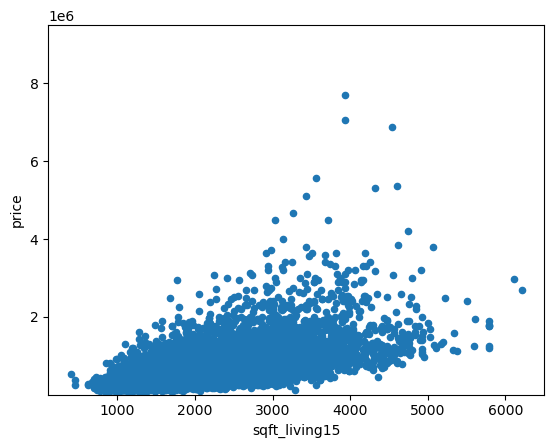

In [18]:
#EDA
var = 'sqft_living15'
data = pd.concat([data['price'],data[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim = (3,9500000))

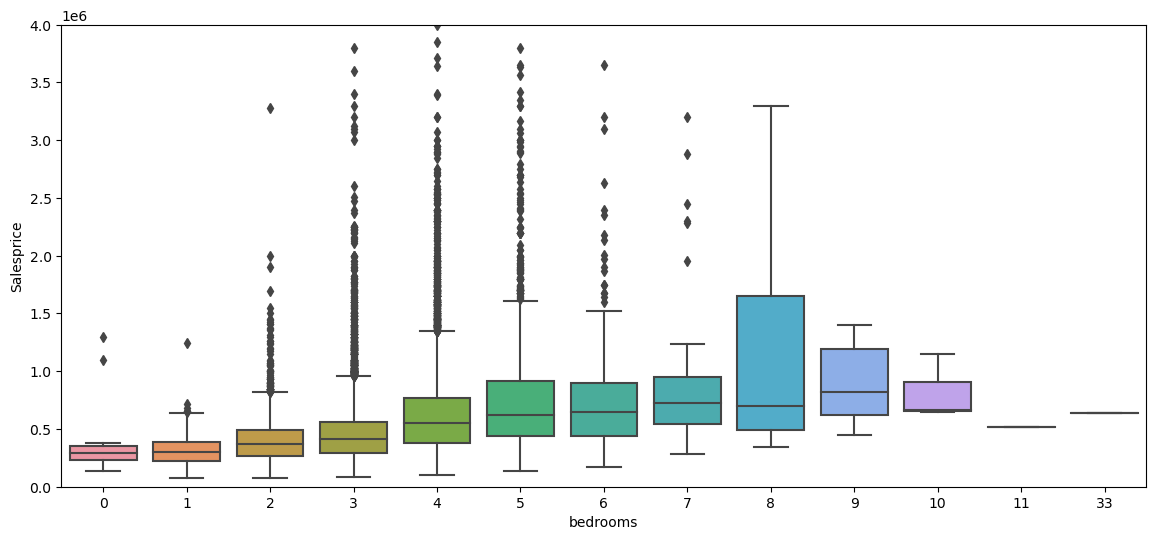

In [32]:
var = 'bedrooms'
data = pd.concat([df_train['Salesprice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(14,6))
fig = sns.boxplot(x=var,y='Salesprice',data=data)
fig.axis(ymin=0,ymax=4000000);

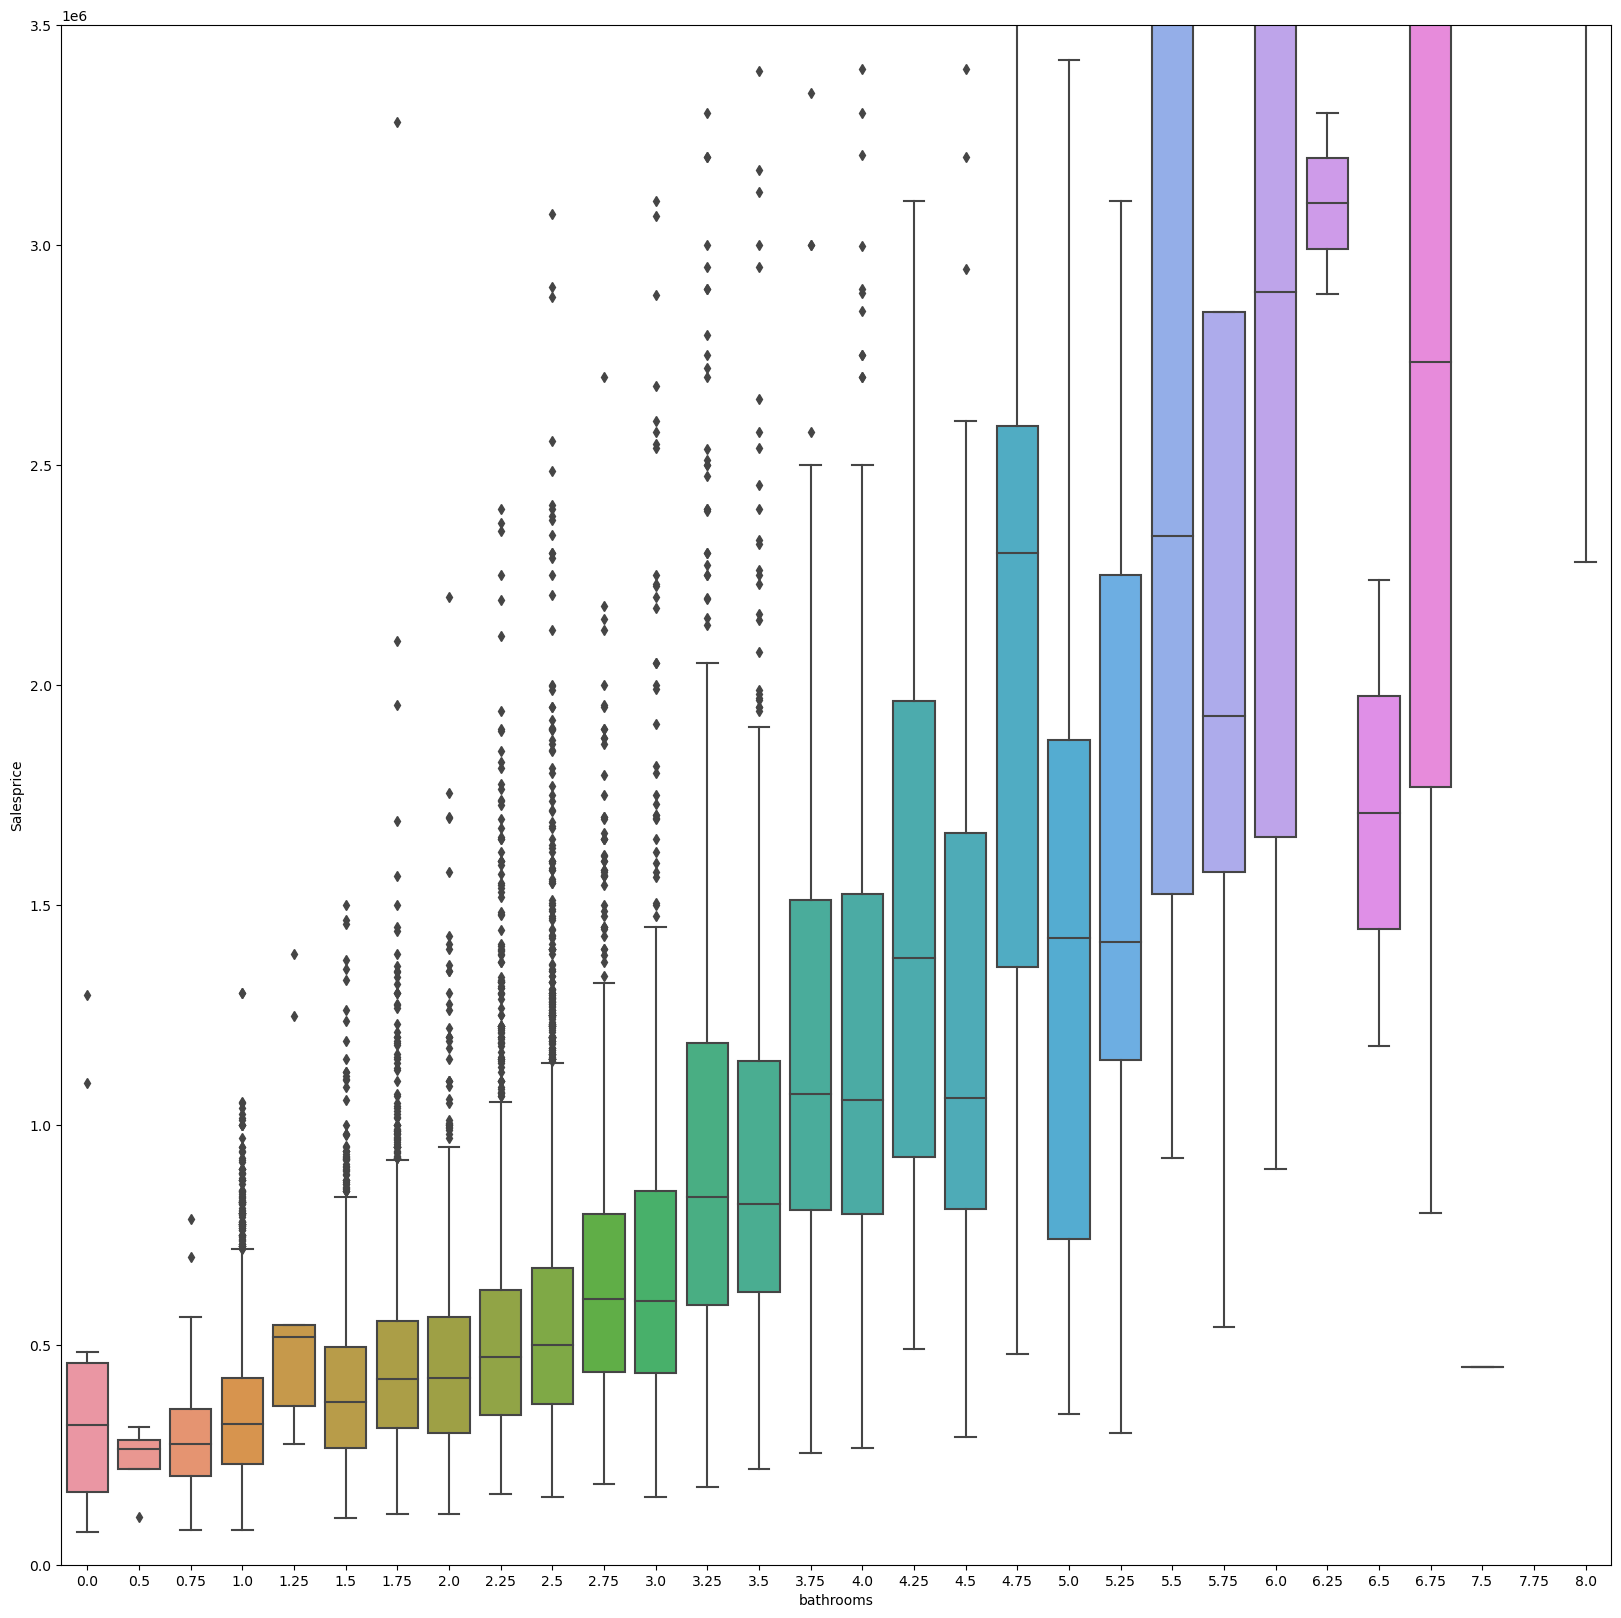

In [34]:
var = 'bathrooms'
data = pd.concat([df_train['Salesprice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="Salesprice", data=data)
fig.axis(ymin=0, ymax=3500000);

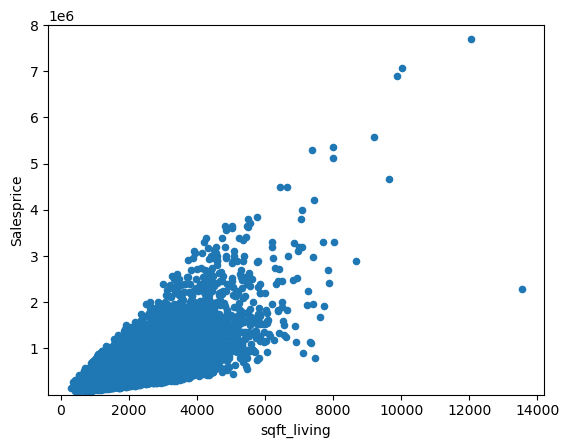

In [35]:
var = 'sqft_living'
data = pd.concat([df_train['Salesprice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Salesprice', ylim=(3,8000000));


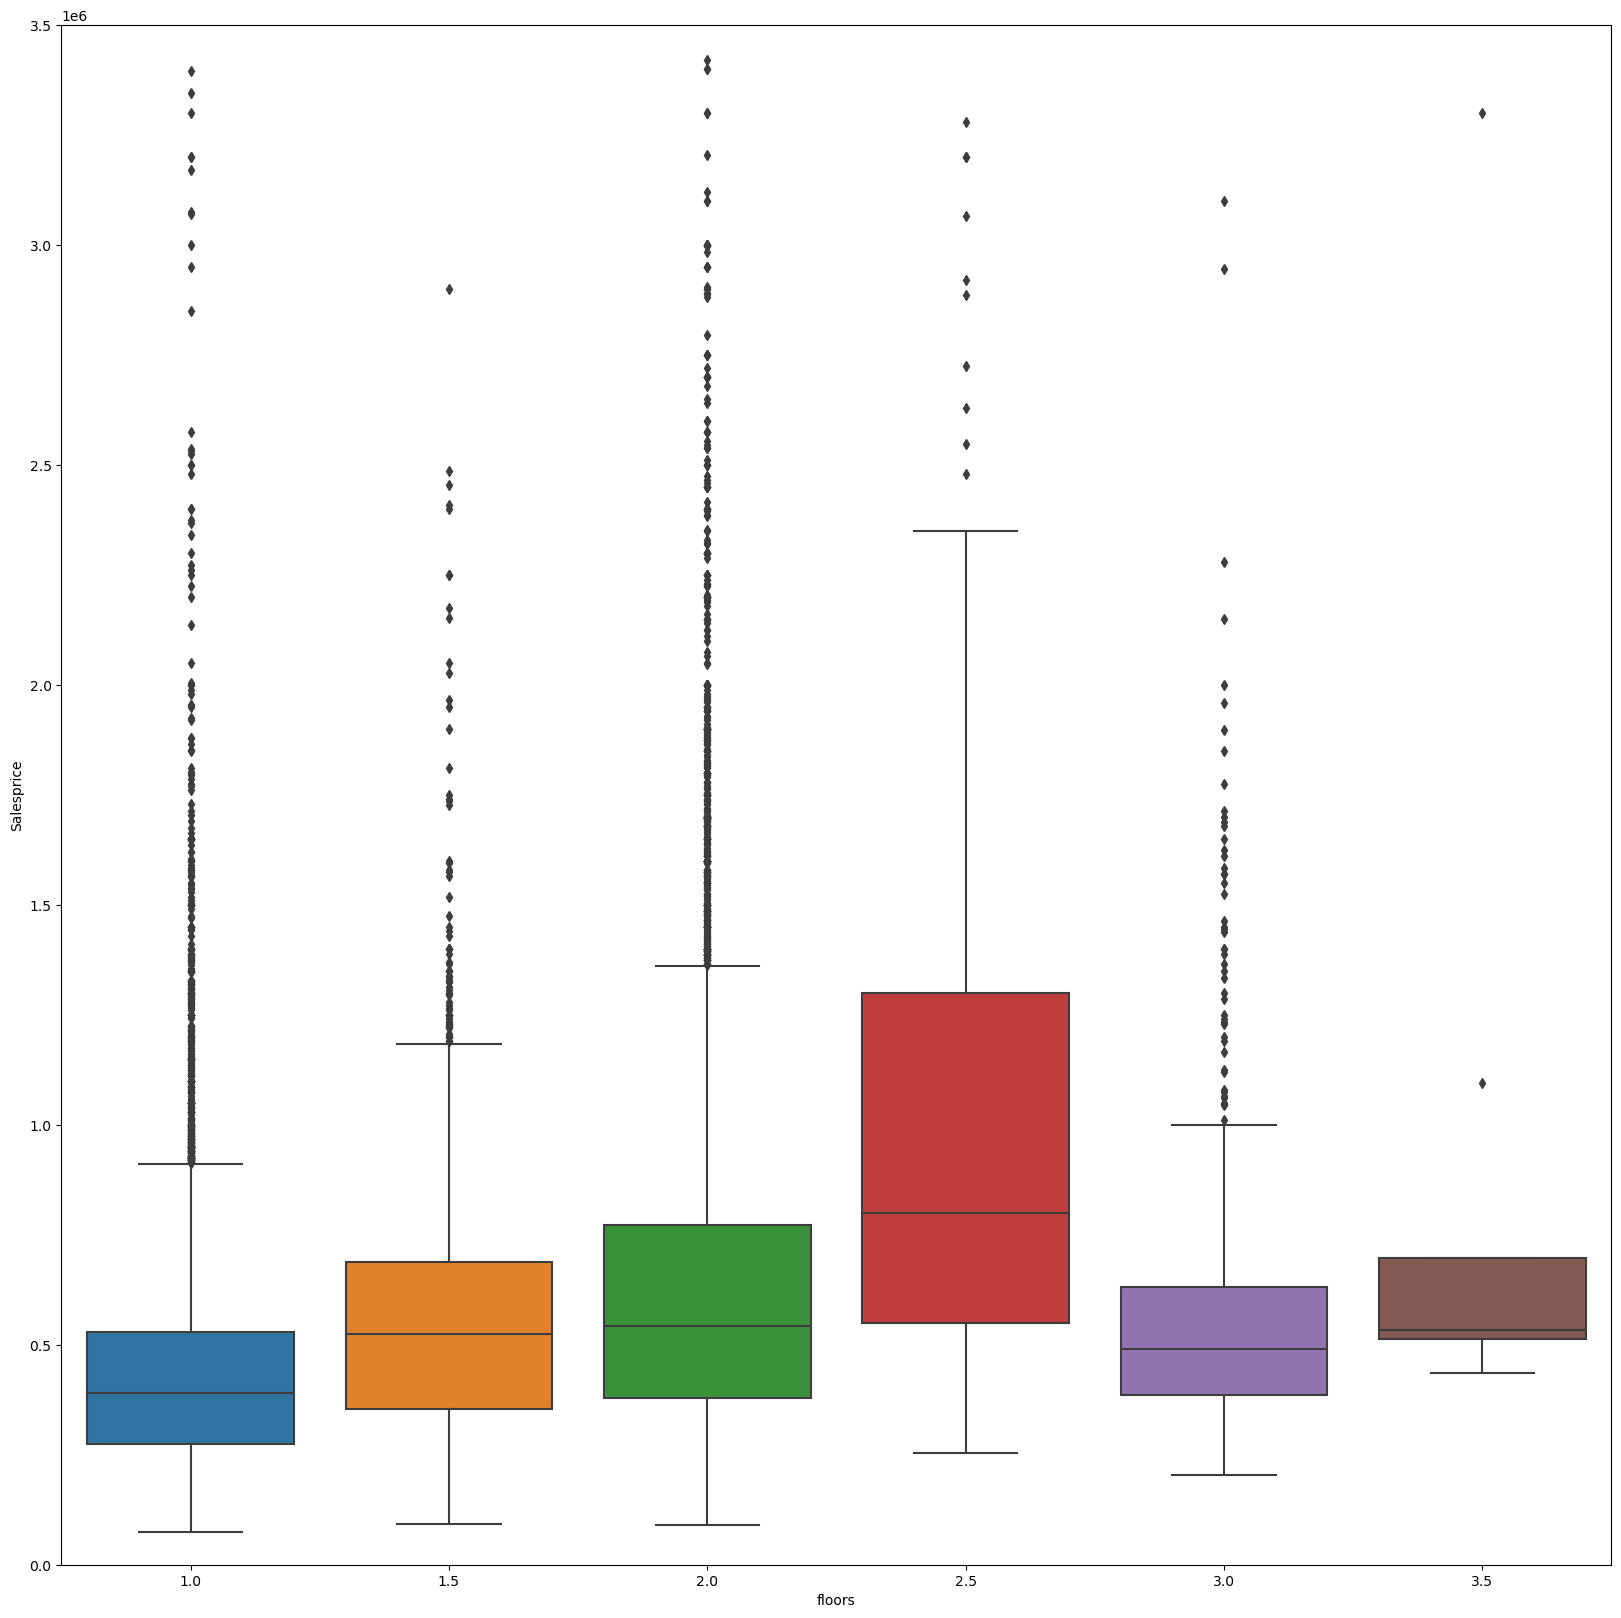

In [36]:
var = 'floors'
data = pd.concat([df_train['Salesprice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="Salesprice", data=data)
fig.axis(ymin=0, ymax=3500000);

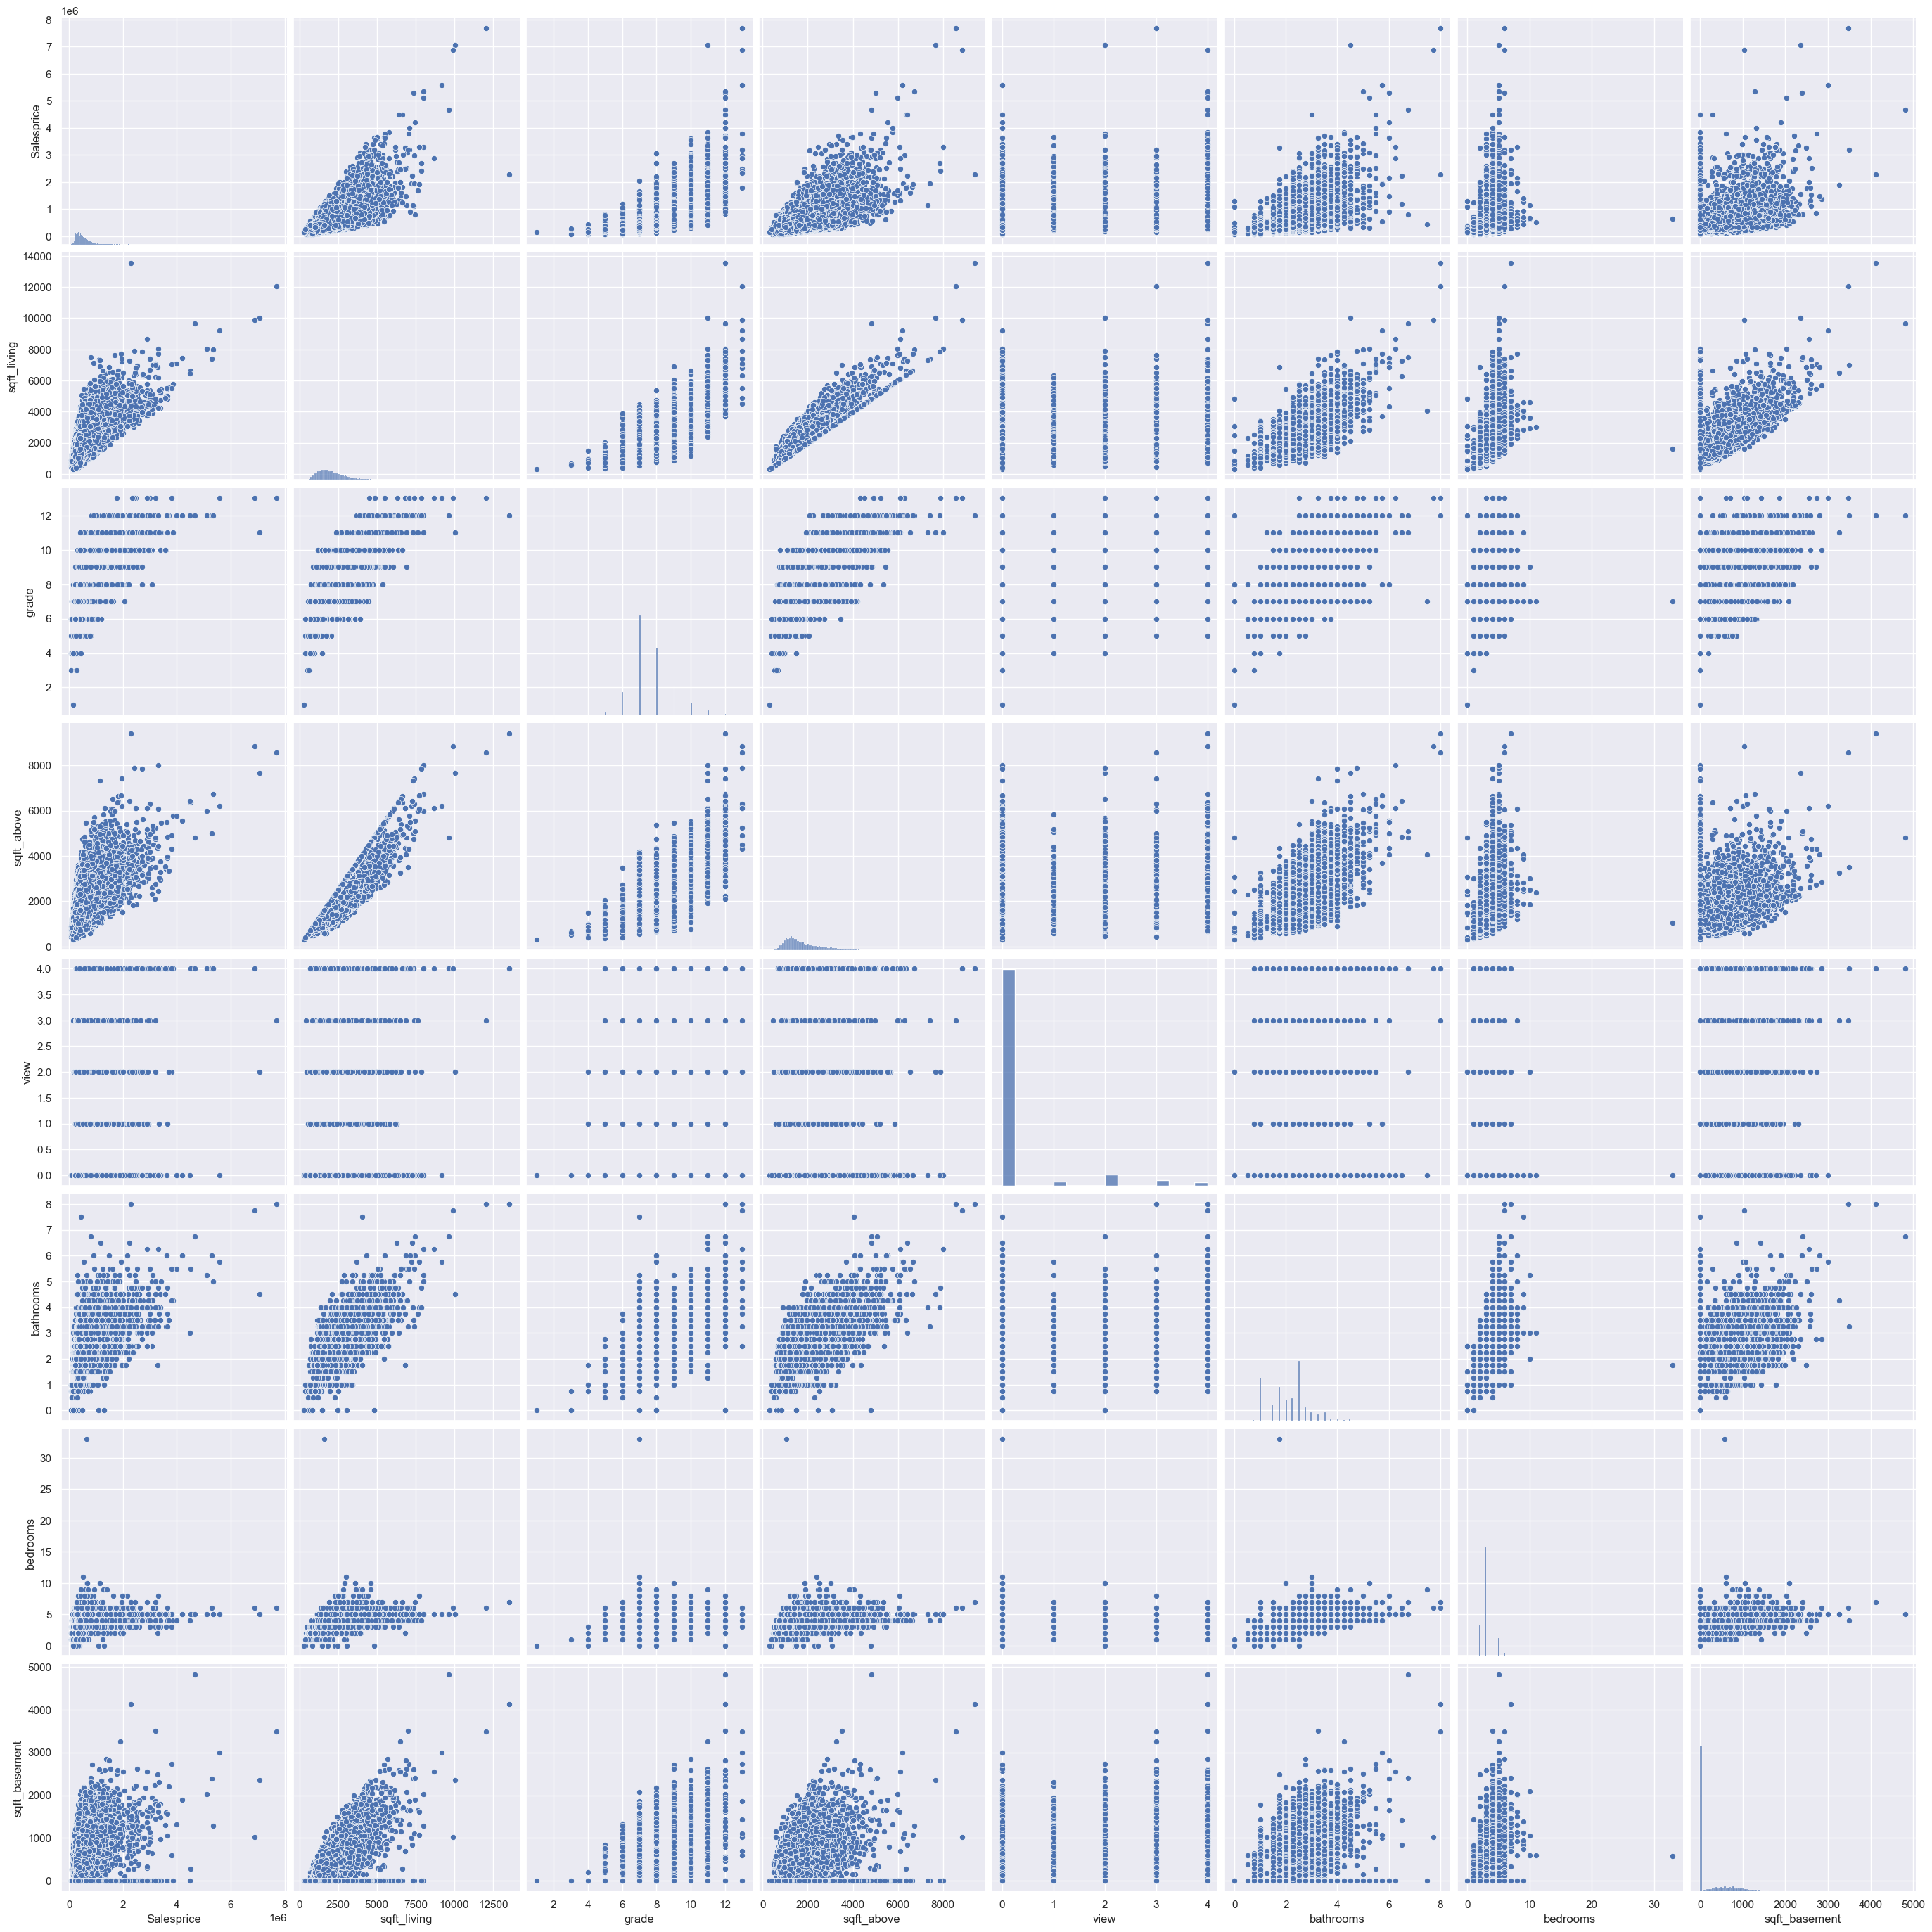

In [37]:
#Pairplots
sns.set()
cols = ['Salesprice', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df_train[cols], height = 3.5)
plt.show();

In [39]:
df_train.dtypes

id                 int64
date              object
Salesprice       float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [40]:
filtered_data = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [41]:
x = filtered_data.values
y = df_train.Salesprice.values

In [42]:
filtered_data.dtypes

sqft_living        int64
grade              int64
sqft_above         int64
sqft_living15      int64
bathrooms        float64
view               int64
sqft_basement      int64
waterfront         int64
yr_built           int64
lat              float64
bedrooms           int64
long             float64
dtype: object

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2)

In [49]:
#Adaboost Regression
adaboost = AdaBoostRegressor(n_estimators=50,learning_rate=0.2,loss='exponential').fit(x_train,y_train)
predict = adaboost.predict(x_test)
r2score = r2_score(predict,y_test)

In [50]:
r2score

0.4224909796561498

In [52]:
#Calculating Mean Squared and Root mean squared error
mse = mean_squared_error(y_test,predict)
rmse = math.sqrt(mse)
print(rmse)

212200.0446080655
